In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

In [2]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

MPRA_df = pd.read_csv('../data/cCRE/cCRE_5_cell_types_Sei_feature_0512.csv')
MPRA_df

,chr,start,end,name_1,name_2,cCRE_type,K562_cCRE_type,HepG2_cCRE_type,SK-N-SH_cCRE_type,HCT116_cCRE_type,A549_cCRE_type,seq,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
0,chr1,115562,115912,EH38F0000002,EH38E3951280,CA-CTCF,CA-CTCF,Low-DNase,Low-DNase,Low-DNase,Low-DNase,CAGATTATACTACAGTGAAAGTTGCCAATGACAAGGCAAAGTCACT...,0.067,0.008,0.011,0.002,0.019,0.001,0.003,0.010,0.003,0.003,0.002,0.003,0.003,0.000,0.039,0.007,0.008,0.005,0.002,0.008,NaN,0.000,NaN,0.006,0.013,0.002,0.002,0.010,0.004,0.000,0.006,0.005,0.040,0.003,0.003,0.013,0.003,0.000,0.001,0.008
1,chr1,138917,139112,EH38D6144710,EH38E3951286,pELS,pELS,Low-DNase,Low-DNase,Low-DNase,Low-DNase,GAGGCAGGAGCTGGGCCTGGACAGGTCAACTTGAGGAGATTTTGGG...,0.237,0.001,0.001,0.001,0.002,0.001,0.063,0.508,0.127,0.001,0.001,0.001,0.000,0.001,0.027,0.778,0.047,0.001,0.000,0.003,NaN,0.001,NaN,0.714,0.690,0.002,0.002,0.001,0.005,0.000,0.001,0.787,0.496,0.001,0.001,0.001,0.000,0.000,0.001,0.786
2,chr1,181014,181237,EH38D4327524,EH38E2776523,CA-H3K4me3,Low-DNase,Low-DNase,Low-DNase,CA-only,Low-DNase,GGCCCGCCCGCCCGGGTCTGACCTGAGGAGAACTGTGCTCCGCCTT...,0.660,0.057,0.011,0.002,0.010,0.001,0.108,0.040,0.287,0.065,0.004,0.003,0.002,0.001,0.015,0.031,0.590,0.090,0.007,0.009,NaN,0.000,NaN,0.082,0.527,0.065,0.011,0.009,0.015,0.001,0.021,0.018,0.680,0.115,0.020,0.007,0.002,0.000,0.002,0.048
3,chr1,181289,181639,EH38D4327525,EH38E2776524,CA-H3K4me3,CA-CTCF,CA-TF,CA-TF,CA-only,CA-only,CGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGC...,0.466,0.013,0.003,0.001,0.002,0.001,0.150,0.006,0.165,0.006,0.002,0.000,0.000,0.001,0.005,0.005,0.487,0.007,0.001,0.001,NaN,0.000,NaN,0.015,0.576,0.012,0.007,0.005,0.012,0.001,0.005,0.006,0.594,0.036,0.009,0.003,0.001,0.000,0.002,0.017
4,chr1,191294,191644,EH38D4327540,EH38E2776526,dELS,Low-DNase,Low-DNase,CA-only,Low-DNase,Low-DNase,ATCAGCAGGGACCGTGCACTCTCTTGGAGCCACCACAGAAAGCAGA...,0.013,0.004,0.001,0.005,0.005,0.000,0.245,0.001,0.044,0.007,0.001,0.033,0.003,0.001,0.041,0.004,0.395,0.008,0.001,0.084,NaN,0.000,NaN,0.017,0.017,0.005,0.001,0.061,0.003,0.000,0.003,0.001,0.031,0.003,0.000,0.044,0.001,0.000,0.001,0.012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368033,chrY,20828581,20828904,EH38D6144374,EH38E3951144,dELS,Low-DNase,Low-DNase,Low-DNase,Low-DNase,CA-TF,TGGAAGAATTTAAAACAGAAATACCAGGCTGGGCGCGGTGGCTCAG...,0.010,0.007,0.003,0.002,0.002,0.000,0.115,0.000,0.020,0.015,0.027,0.001,0.003,0.000,0.003,0.001,0.000,0.004,0.006,0.002,NaN,0.000,NaN,0.000,0.070,0.033,0.036,0.002,0.174,0.000,0.000,0.001,0.072,0.028,0.019,0.001,0.003,0.000,0.001,0.001
368034,chrY,21021830,21022179,EH38D6144412,EH38E3951161,dELS,Low-DNase,dELS,Low-DNase,Low-DNase,Low-DNase,GCCAGTGGAAATCTTGTTGGGTTTCTCTCGTCCCACTAATGTTACC...,0.048,0.003,0.006,0.003,0.047,0.004,0.006,0.001,0.715,0.075,0.140,0.004,0.135,0.001,0.020,0.013,0.037,0.018,0.202,0.021,NaN,0.001,NaN,0.003,0.870,0.037,0.104,0.002,0.368,0.001,0.000,0.008,0.911,0.095,0.077,0.007,0.025,0.001,0.003,0.019
368035,chrY,26315142,26315389,EH38D4327358,EH38E2776433,CA-CTCF,CA-CTCF,Low-DNase,Low-DNase,Low-DNase,CA-TF,AATCTGCATTCCCTATACTAAAACACTTAAATGGAATGGGATAGAA...,0.300,0.001,0.001,0.001,0.002,0.001,0.003,0.562,0.088,0.003,0.000,0.000,0.001,0.000,0.010,0.807,0.212,0.005,0.001,0.001,NaN,0.000,NaN,0.884,0.757,0.003,0.001,0.003,0.007,0.000,0.003,0.804,0.782,0.007,0.003,0.007,0.003,0.000,0.001,0.799
36

In [5]:
y_pred = np.load(f'../saved/0507_GosaiMPRA_MyResTransformer3_600bp/0507_112907/cCRE_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred
MPRA_df

,chr,start,end,name_1,name_2,cCRE_type,K562_cCRE_type,HepG2_cCRE_type,SK-N-SH_cCRE_type,HCT116_cCRE_type,A549_cCRE_type,seq,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF,K562_pred,HepG2_pred,SK-N-SH_pred,HCT116_pred,A549_pred
0,chr1,115562,115912,EH38F0000002,EH38E3951280,CA-CTCF,CA-CTCF,Low-DNase,Low-DNase,Low-DNase,Low-DNase,CAGATTATACTACAGTGAAAGTTGCCAATGACAAGGCAAAGTCACT...,0.067,0.008,0.011,0.002,0.019,0.001,0.003,0.010,0.003,0.003,0.002,0.003,0.003,0.000,0.039,0.007,0.008,0.005,0.002,0.008,NaN,0.000,NaN,0.006,0.013,0.002,0.002,0.010,0.004,0.000,0.006,0.005,0.040,0.003,0.003,0.013,0.003,0.000,0.001,0.008,-0.196,-0.490,-0.444,-0.394,-0.283
1,chr1,138917,139112,EH38D6144710,EH38E3951286,pELS,pELS,Low-DNase,Low-DNase,Low-DNase,Low-DNase,GAGGCAGGAGCTGGGCCTGGACAGGTCAACTTGAGGAGATTTTGGG...,0.237,0.001,0.001,0.001,0.002,0.001,0.063,0.508,0.127,0.001,0.001,0.001,0.000,0.001,0.027,0.778,0.047,0.001,0.000,0.003,NaN,0.001,NaN,0.714,0.690,0.002,0.002,0.001,0.005,0.000,0.001,0.787,0.496,0.001,0.001,0.001,0.000,0.000,0.001,0.786,0.596,0.508,0.359,1.030,0.863
2,chr1,181014,181237,EH38D4327524,EH38E2776523,CA-H3K4me3,Low-DNase,Low-DNase,Low-DNase,CA-only,Low-DNase,GGCCCGCCCGCCCGGGTCTGACCTGAGGAGAACTGTGCTCCGCCTT...,0.660,0.057,0.011,0.002,0.010,0.001,0.108,0.040,0.287,0.065,0.004,0.003,0.002,0.001,0.015,0.031,0.590,0.090,0.007,0.009,NaN,0.000,NaN,0.082,0.527,0.065,0.011,0.009,0.015,0.001,0.021,0.018,0.680,0.115,0.020,0.007,0.002,0.000,0.002,0.048,5.436,5.105,5.324,5.314,5.461
3,chr1,181289,181639,EH38D4327525,EH38E2776524,CA-H3K4me3,CA-CTCF,CA-TF,CA-TF,CA-only,CA-only,CGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGC...,0.466,0.013,0.003,0.001,0.002,0.001,0.150,0.006,0.165,0.006,0.002,0.000,0.000,0.001,0.005,0.005,0.487,0.007,0.001,0.001,NaN,0.000,NaN,0.015,0.576,0.012,0.007,0.005,0.012,0.001,0.005,0.006,0.594,0.036,0.009,0.003,0.001,0.000,0.002,0.017,5.974,5.748,5.981,6.124,6.093
4,chr1,191294,191644,EH38D4327540,EH38E2776526,dELS,Low-DNase,Low-DNase,CA-only,Low-DNase,Low-DNase,ATCAGCAGGGACCGTGCACTCTCTTGGAGCCACCACAGAAAGCAGA...,0.013,0.004,0.001,0.005,0.005,0.000,0.245,0.001,0.044,0.007,0.001,0.033,0.003,0.001,0.041,0.004,0.395,0.008,0.001,0.084,NaN,0.000,NaN,0.017,0.017,0.005,0.001,0.061,0.003,0.000,0.003,0.001,0.031,0.003,0.000,0.044,0.001,0.000,0.001,0.012,0.681,0.741,0.914,0.687,0.709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368033,chrY,20828581,20828904,EH38D6144374,EH38E3951144,dELS,Low-DNase,Low-DNase,Low-DNase,Low-DNase,CA-TF,TGGAAGAATTTAAAACAGAAATACCAGGCTGGGCGCGGTGGCTCAG...,0.010,0.007,0.003,0.002,0.002,0.000,0.115,0.000,0.020,0.015,0.027,0.001,0.003,0.000,0.003,0.001,0.000,0.004,0.006,0.002,NaN,0.000,NaN,0.000,0.070,0.033,0.036,0.002,0.174,0.000,0.000,0.001,0.072,0.028,0.019,0.001,0.003,0.000,0.001,0.001,3.137,3.326,3.115,3.423,3.384
368034,chrY,21021830,21022179,EH38D6144412,EH38E3951161,dELS,Low-DNase,dELS,Low-DNase,Low-DNase,Low-DNase,GCCAGTGGAAATCTTGTTGGGTTTCTCTCGTCCCACTAATGTTACC...,0.048,0.003,0.006,0.003,0.047,0.004,0.006,0.001,0.715,0.075,0.140,0.004,0.135,0.001,0.020,0.013,0.037,0.018,0.202,0.021,NaN,0.001,NaN,0.003,0.870,0.037,0.104,0.002,0.368,0.001,0.000,0.008,0.911,0.095,0.077,0.007,0.025,0.001,0.003,0.019,1.143,2.777,2.540,2.664,2.613
368035,chrY,26315142,26315389,EH38D4327358,EH38E2776433,CA-CTCF,CA-CTCF,Low-DNase,Low-DNase,Low-DNase,CA-

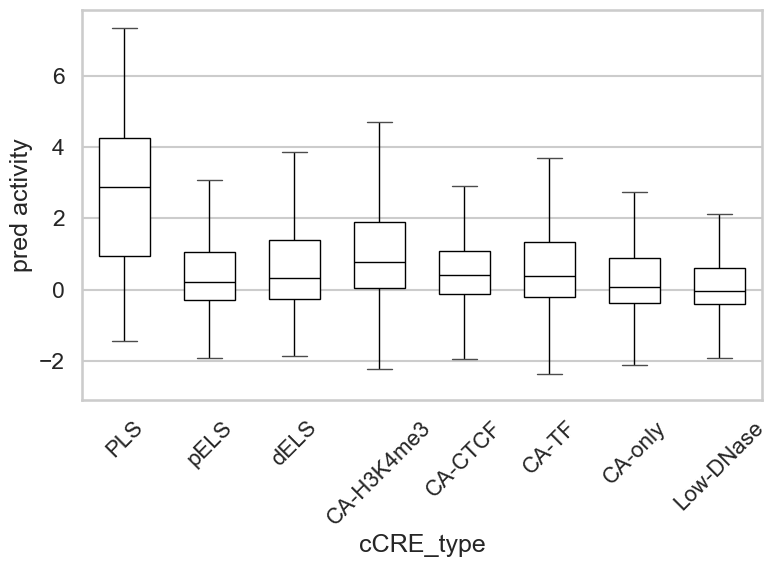

In [14]:
cCRE_types = ['PLS', 'pELS', 'dELS', 'CA-H3K4me3', 'CA-CTCF', 'CA-TF', 'CA-only', 'Low-DNase']

plot_data = []
for cell_type in cell_types[:1]:
    for cCRE_type in cCRE_types:
        df = MPRA_df[MPRA_df[f'{cell_type}_cCRE_type'] == cCRE_type]
        values = df[f'{cell_type}_pred'].dropna()
        # plot_data.append(values)
        for v in values:
            plot_data.append({
                "cCRE_type": cCRE_type,
                "pred": v
            })
            
plot_df = pd.DataFrame(plot_data)
x = plot_df['cCRE_type']
y = plot_df['pred']


plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.1, bottom=0.3, right=0.95, top=0.95)
sns.boxplot(x=x, y=y, 
            fliersize=0, width=0.6,
            boxprops={"facecolor":"white", "edgecolor":"black"},
            whiskerprops={"color":"black"},
            medianprops={"color":"black"})
plt.ylabel('pred activity')
plt.xticks(fontsize=16, rotation=45)
plt.savefig('figures/cCRE_K562_boxplot.png', dpi=400)

In [4]:

pearson_df = pd.DataFrame(dtype=float)

for cell_type in cell_types:
    for cell_type_2 in cell_types:
        # condition_1 = data_split_dict['total']
        # condition_2 = data_split_dict[f'{cell_type}_specific']
        # df = MPRA_df[condition_1 & condition_2]
        df = MPRA_df
        x = df[f'{cell_type}']
        y = df[f'{cell_type_2}']
        r = pearson(x, y)[0]
        pearson_df.loc[cell_type, cell_type_2] = r
print('specific')
print(pearson_df)



KeyError: 'K562'

total
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.801    0.759   0.825 0.724
HepG2   0.801  1.000    0.836   0.879 0.730
SK-N-SH 0.759  0.836    1.000   0.833 0.777
HCT116  0.825  0.879    0.833   1.000 0.825
A549    0.724  0.730    0.777   0.825 1.000


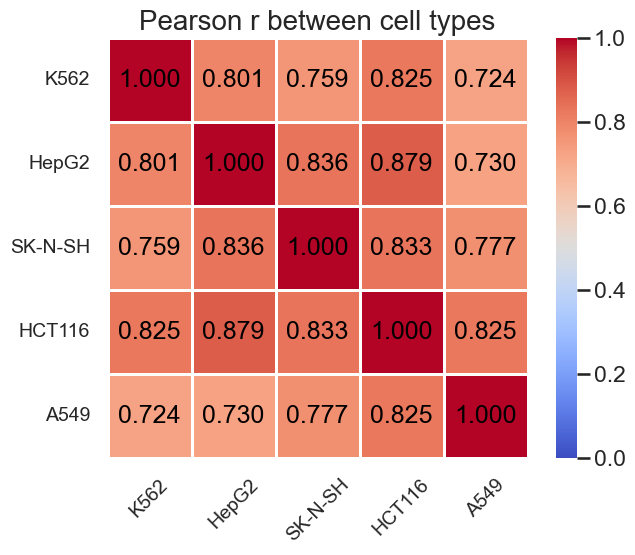

diff
         K562  HepG2  SK-N-SH  HCT116  A549
K562    1.000  0.471    0.453   0.516 0.561
HepG2   0.471  1.000    0.622   0.675 0.617
SK-N-SH 0.453  0.622    1.000   0.649 0.771
HCT116  0.516  0.675    0.649   1.000 0.821
A549    0.561  0.617    0.771   0.821 1.000


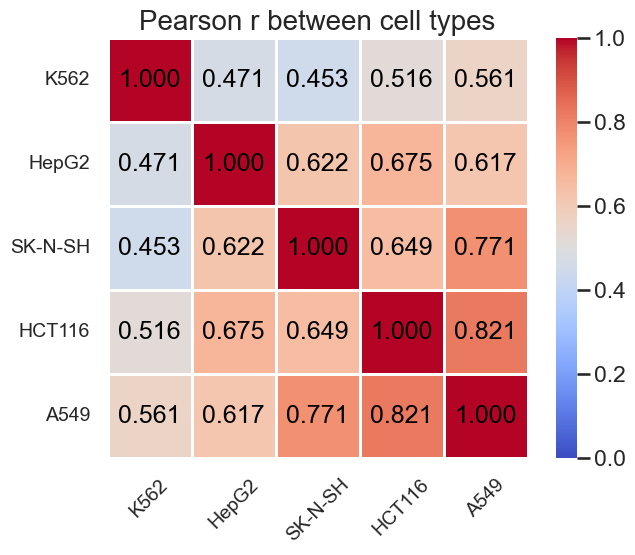

In [37]:
for data_split in ['total', 'diff']:
    pearson_df = pd.DataFrame(dtype=float)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]

            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_2}']
            r = pearson(x, y)[0]
            pearson_df.loc[cell_type, cell_type_2] = r
    print(data_split)
    print(pearson_df)

    # pearson_df.loc['HCT116', 'A549'] = np.nan
    # pearson_df.loc['A549', 'HCT116'] = np.nan


    plt.figure(figsize=(8, 6), dpi=100)
    # plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
    sns.heatmap(pearson_df, square=True, linewidths=1, cmap='coolwarm', vmin=0, vmax=1, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.columns, 
            rotation=45, fontsize=14)
    plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.index, 
            rotation=0, fontsize=14)
    plt.title(f'Pearson r between cell types', fontsize=20)
    plt.grid(False)
    plt.savefig(f'figures/Gosai_heatmap_activity_pearson_{data_split}.png', dpi=400)
    plt.show()

test
         K562_pred  HepG2_pred  SK-N-SH_pred  HCT116_pred  A549_pred
K562         0.817       0.781         0.787        0.793      0.789
HepG2        0.834       0.851         0.832        0.836      0.842
SK-N-SH      0.800       0.796         0.821        0.797      0.795
HCT116       0.817       0.817         0.815        0.824      0.815
A549         0.710       0.710         0.717        0.727      0.729


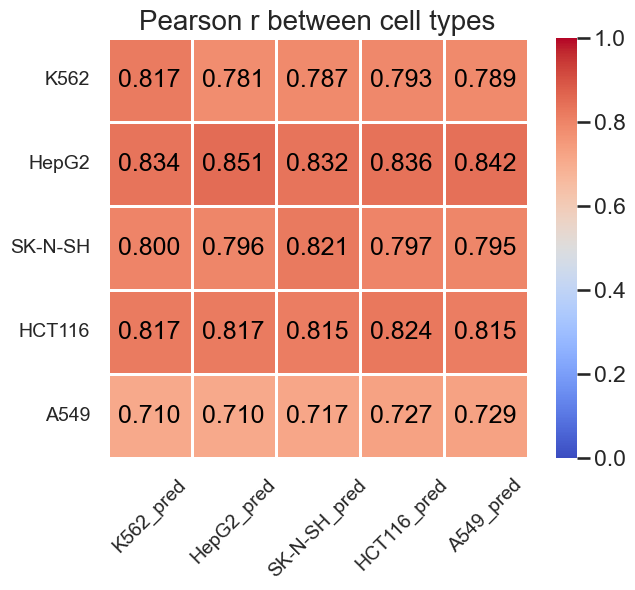

test_diff
         K562_pred  HepG2_pred  SK-N-SH_pred  HCT116_pred  A549_pred
K562         0.708       0.570         0.611        0.608      0.592
HepG2        0.661       0.748         0.677        0.695      0.726
SK-N-SH      0.627       0.608         0.704        0.643      0.628
HCT116       0.696       0.684         0.698        0.742      0.701
A549         0.660       0.695         0.714        0.706      0.705


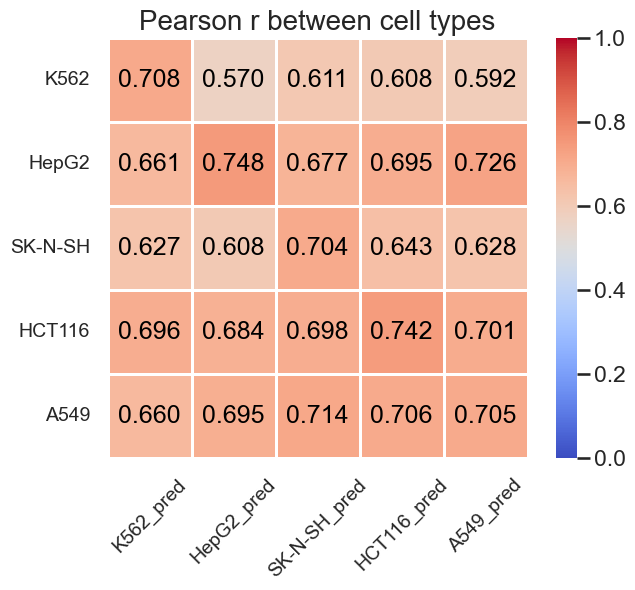

In [38]:
for data_split in ['test', 'test_diff']:
    pearson_df = pd.DataFrame(dtype=float)
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]

            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_2}_pred']
            r = pearson(x, y)[0]
            pearson_df.loc[cell_type, f'{cell_type_2}_pred'] = r
    print(data_split)
    print(pearson_df)

    # pearson_df.loc['HCT116', 'A549'] = np.nan
    # pearson_df.loc['A549', 'HCT116'] = np.nan


    plt.figure(figsize=(8, 6), dpi=100)
    #plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
    sns.heatmap(pearson_df, square=True, linewidths=1, cmap='coolwarm', vmin=0.0, vmax=1, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.columns, 
            rotation=45, fontsize=14)
    plt.yticks(ticks=np.arange(len(cell_types))+0.5, labels=pearson_df.index, 
            rotation=0, fontsize=14)
    plt.title(f'Pearson r between cell types', fontsize=20)
    plt.grid(False)
    plt.savefig(f'figures/Gosai_heatmap_pred_activity_pearson_{data_split}.png', dpi=400)
    plt.show()